Taken from https://www.kaggle.io/svf/693586/bb46d34584c652ba00b92158a395f8d7/__results__.html#Covariance-matrix

In [ ]:
import subprocess
from subprocess import check_output
try:
    print(check_output(["ls", "/Users/amit/kaggle/HumanResourceAnalytics/input"]).decode("utf8"))
except subprocess.CalledProcessError as e:
    raise RuntimeError("command '{}' return with error (code {}): {}".format(e.cmd, e.returncode, e.output))

<h2>
1. Import library
</h2>

In [16]:
import pandas as pd
import numpy as np # Linear Algebra
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<h2>2. Loading the dataset</h2>

In [121]:
df = pd.read_csv("input/HR_comma_sep.csv")

In [122]:
column_names = df.columns.tolist()

In [123]:
column_names

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'sales',
 'salary']

In [124]:
df.shape

(14999, 10)

In [125]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


<b><font color = 'blue'>df.corr():</font></b><br> Compute pairwise correlation of columns.Correlation shows how the two variables are related to each other.<br>
- Positive values shows as one variable increases other variable increases as well. 
- Negative values shows as one variable increases other variable decreases.

###### Bigger the values,more strongly two varibles are correlated and viceversa.

In [126]:
df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


<font color = 'blue'><b>Visualizing correlation using <u>Seaborn</u> library:

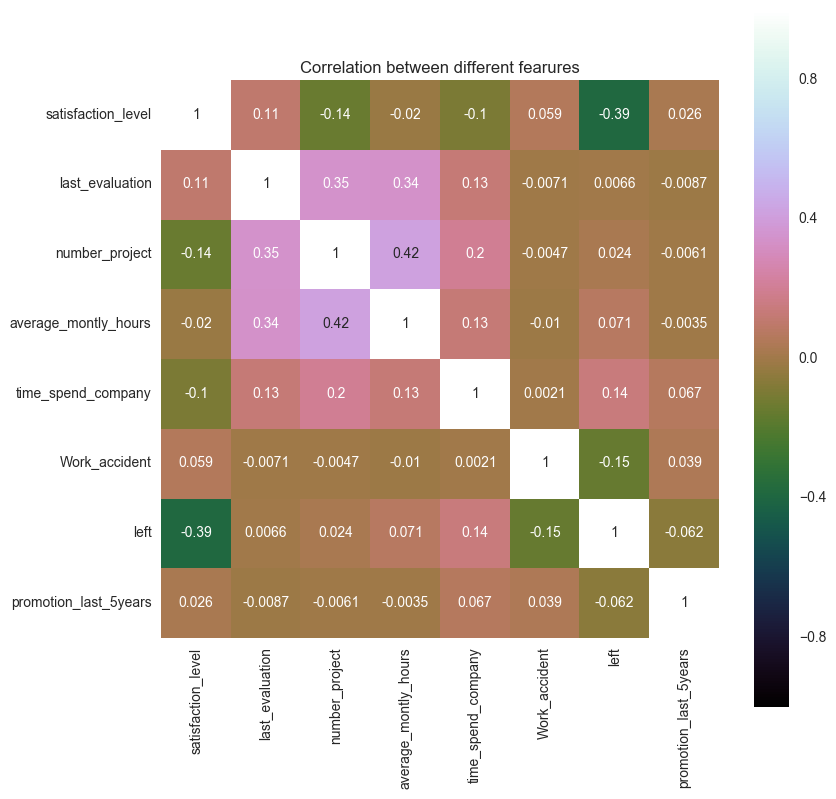

In [127]:
correlation = df.corr()
plt.figure(figsize=(9,9))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different fearures')

<b> More visualization before moving to PCA

In [128]:
df['sales'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [129]:
column_names

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'sales',
 'salary']

<b>Here we are printing all the unique values in sales columns

In [130]:
groupby_sales = df['satisfaction_level'].groupby(df.sales).mean()

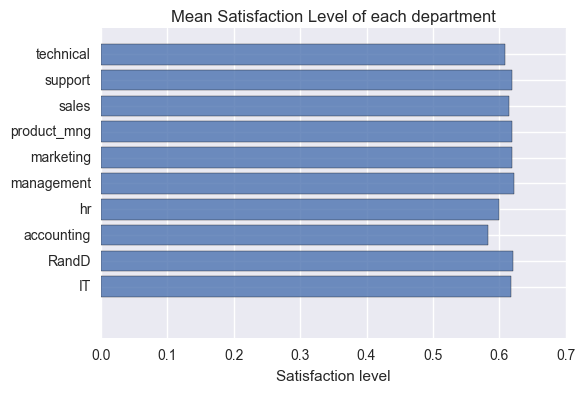

In [132]:
y_pos = np.arange(groupby_sales.size)
x = np.arange(0, 1, 0.1)
plt.barh(y_pos, groupby_sales, align='center', alpha=0.8)
plt.yticks(y_pos,groupby_sales.index )
plt.xlabel('Satisfaction level')
plt.title('Mean Satisfaction Level of each department')

<h2><b> Principal Component Analysis

In [133]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [134]:
df['salary'] = df['salary'].map({'low': 0, 'medium': 1, 'high': 2})

In [135]:
df_drop = df.drop('sales', axis = 1)

In [137]:
cols = df_drop.columns.tolist()
cols

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'salary']

In [138]:
cols.insert(0, cols.pop(cols.index('left')))

In [139]:
cols

['left',
 'satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years',
 'salary']

In [140]:
df_drop = df_drop.reindex(columns= cols)

In [141]:
df_drop.head()

,left,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary
0,1,0.38,0.53,2,157,3,0,0,0
1,1,0.80,0.86,5,262,6,0,0,1
2,1,0.11,0.88,7,272,4,0,0,1
3,1,0.72,0.87,5,223,5,0,0,0
4,1,0.37,0.52,2,159,3,0,0,0


By using df_drop.reindex(columns= cols) we are converting list to columns again<br>
Now we are separating features of our dataframe from the labels.

In [142]:
X = df_drop.iloc[:,1:8].values
y = df_drop.iloc[:,0].values

In [145]:
print(y)
np.shape(y)

[1 1 1 ..., 1 1 1]


(14999,)

y is now matrix with 14999 rows and 1 column

<h3>4. Data Standardisation</h3>

Standardisation refers to shifting the distribution of each attribute to have a mean of zero and standard deviation of one(unit variance). It is useful to standardize attributes for a model. Standardization of datasets is a common requirement for many machine learning estimators in scikit-learn; they might behave badly iif the individual features do not more of less look like standard normally distributed data. 


In [146]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [147]:
print(X_std)

[[-0.93649469 -1.08727529 -1.46286291 ..., -0.34123516 -0.41116529
  -0.14741182]
 [ 0.75281433  0.84070693  0.97111292 ...,  1.71343614 -0.41116529
  -0.14741182]
 [-2.02247906  0.95755433  2.59376348 ...,  0.34365527 -0.41116529
  -0.14741182]
 ..., 
 [-0.97671633 -1.08727529 -1.46286291 ..., -0.34123516 -0.41116529
  -0.14741182]
 [-2.02247906  1.42494396  1.7824382  ...,  0.34365527 -0.41116529
  -0.14741182]
 [-0.97671633 -1.14569899 -1.46286291 ..., -0.34123516 -0.41116529
  -0.14741182]]


<h3>5) Computing Eigenvectors and Eigenvalues:</h3><br>
Before computing Eigen vectors and values we need to calculate covariance matrix.<br>
Covariance matrix

In [149]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00006668  0.10502822 -0.14297912 -0.02004945 -0.1008728   0.05870115
   0.02560689]
 [ 0.10502822  1.00006668  0.34935588  0.33976445  0.1315995  -0.00710476
  -0.00868435]
 [-0.14297912  0.34935588  1.00006668  0.41723845  0.19679901 -0.00474086
  -0.00606436]
 [-0.02004945  0.33976445  0.41723845  1.00006668  0.12776343 -0.01014356
  -0.00354465]
 [-0.1008728   0.1315995   0.19679901  0.12776343  1.00006668  0.00212056
   0.06743742]
 [ 0.05870115 -0.00710476 -0.00474086 -0.01014356  0.00212056  1.00006668
   0.03924805]
 [ 0.02560689 -0.00868435 -0.00606436 -0.00354465  0.06743742  0.03924805
   1.00006668]]


In [150]:
print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

NumPy covariance matrix: 
[[ 1.00006668  0.10502822 -0.14297912 -0.02004945 -0.1008728   0.05870115
   0.02560689]
 [ 0.10502822  1.00006668  0.34935588  0.33976445  0.1315995  -0.00710476
  -0.00868435]
 [-0.14297912  0.34935588  1.00006668  0.41723845  0.19679901 -0.00474086
  -0.00606436]
 [-0.02004945  0.33976445  0.41723845  1.00006668  0.12776343 -0.01014356
  -0.00354465]
 [-0.1008728   0.1315995   0.19679901  0.12776343  1.00006668  0.00212056
   0.06743742]
 [ 0.05870115 -0.00710476 -0.00474086 -0.01014356  0.00212056  1.00006668
   0.03924805]
 [ 0.02560689 -0.00868435 -0.00606436 -0.00354465  0.06743742  0.03924805
   1.00006668]]


<font color = 'blue'>Equivalently we could have used Numpy np.cov to calculate covariance matrix

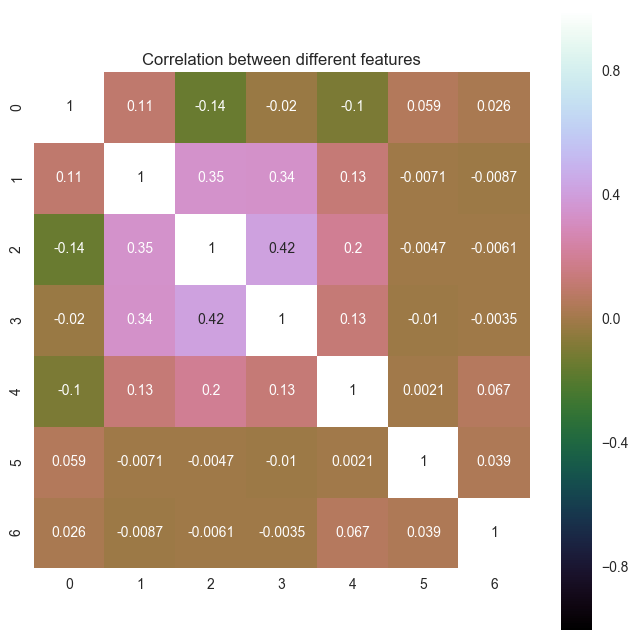

In [151]:
plt.figure(figsize=(8,8))
sns.heatmap(cov_mat, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different features')

<h3>Eigen decomposition of the covariance matrix

In [152]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.08797699  0.29189921  0.27784886  0.33637135  0.79752505  0.26786864
  -0.09438973]
 [-0.50695734 -0.30996609 -0.70780994  0.07393548  0.33180877  0.1101505
  -0.13499526]
 [-0.5788351   0.77736008 -0.00657105 -0.19677589 -0.10338032 -0.10336241
  -0.02293518]
 [-0.54901653 -0.45787675  0.63497294 -0.25170987  0.10388959 -0.01034922
  -0.10714981]
 [-0.31354922 -0.05287224  0.12200054  0.78782241 -0.28404472  0.04036861
   0.42547869]
 [ 0.01930249 -0.04433104 -0.03622859 -0.05762997  0.37489883 -0.8048393
   0.45245222]
 [-0.00996933 -0.00391698 -0.04873036 -0.39411153  0.10557298  0.50589173
   0.75836313]]

Eigenvalues 
[ 1.83017431  0.54823098  0.63363587  0.84548166  1.12659606  0.95598647
  1.06036136]


<h3>6) Selecting Principal Components</h3><br>
T In order to decide which eigenvector(s) can dropped without losing too much information for the construction of lower-dimensional subspace, we need to inspect the corresponding eigenvalues: The eigenvectors with the lowest eigenvalues bear the least information about the distribution of the data; those are the ones can be dropped.

In [154]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
1.83017431388
1.12659606399
1.06036136228
0.955986474007
0.845481663714
0.633635874483
0.548230976542


<b>Explained Variance</b> After sorting the eigenpairs, the next question is "how many principal components are we going to choose for our new feature subspace?" A useful measure is the so-called "explained variance," which can be calculated from the eigenvalues. The explained variance tells us how much information (variance) can be attributed to each of the principal components.

In [155]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]

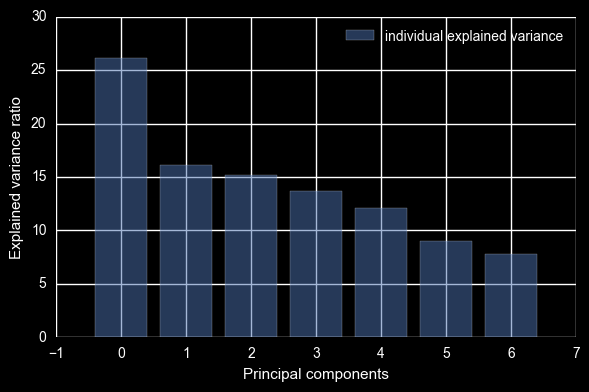

In [156]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(7), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

The plot above clearly shows that maximum variance (somewhere around 26%) can be explained by the first principal component alone. The second,third,fourth and fifth principal component share almost equal amount of information.Comparatively 6th and 7th components share less amount of information as compared to the rest of the Principal components.But those information cannot be ignored since they both contribute almost 17% of the data.But we can drop the last component as it has less than 10% of the variance<br><br>
<b>Projection Matrix</b><br><br>
The construction of the projection matrix that will be used to transform the Human resouces analytics data onto the new feature subspace. Suppose only 1st and 2nd principal component shares the maximum amount of information say around 90%.Hence we can drop other components. Here, we are reducing the 7-dimensional feature space to a 2-dimensional feature subspace, by choosing the “top 2” eigenvectors with the highest eigenvalues to construct our d×k-dimensional eigenvector matrix W

In [157]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(7,1), 
                      eig_pairs[1][1].reshape(7,1)
                    ))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.08797699  0.79752505]
 [-0.50695734  0.33180877]
 [-0.5788351  -0.10338032]
 [-0.54901653  0.10388959]
 [-0.31354922 -0.28404472]
 [ 0.01930249  0.37489883]
 [-0.00996933  0.10557298]]


<b>Projection Onto the New Feature Space </b><br>In this last step we will use the 7×2-dimensional projection matrix W to transform our samples onto the new subspace via the equation Y=X×W

In [159]:
Y = X_std.dot(matrix_w)
Y

array([[ 1.90035018, -1.12083103],
       [-2.1358322 ,  0.2493369 ],
       [-3.05891625, -1.68312693],
       ..., 
       [ 2.0507165 , -1.182032  ],
       [-2.91418496, -1.42752606],
       [ 1.91543672, -1.17021407]])

<h3>PCA in scikit-learn

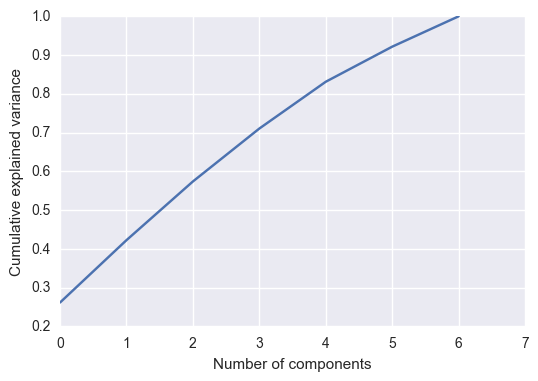

In [160]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,7,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

The above plot shows almost 90% variance by the first 6 components. Therfore we can drop 7th component.

In [161]:
from sklearn.decomposition import PCA 
sklearn_pca = PCA(n_components=6)
Y_sklearn = sklearn_pca.fit_transform(X_std)

In [162]:
print(Y_sklearn)

[[-1.90035018 -1.12083103 -0.0797787   0.03228437 -0.07256447  0.06063013]
 [ 2.1358322   0.2493369   0.0936161   0.50676925  1.2487747  -0.61378158]
 [ 3.05891625 -1.68312693 -0.301682   -0.4488635  -1.12495888  0.29066929]
 ..., 
 [-2.0507165  -1.182032   -0.04594506  0.02441143 -0.01553247  0.24980658]
 [ 2.91418496 -1.42752606 -0.36333357 -0.31517759 -0.97107375  0.51444624]
 [-1.91543672 -1.17021407 -0.07024077  0.01486762 -0.09545357  0.01773844]]


In [163]:
Y_sklearn.shape

(14999, 6)

Thus Principal Component Analysis is used to remove the redundant features from the datasets without losing much information.These features are low dimensional in nature.The first component has the highest variance followed by second, third and so on.PCA works best on data set having 3 or higher dimensions. Because, with higher dimensions, it becomes increasingly difficult to make interpretations from the resultant cloud of data.